Análises

1. Pessoas que repetiram a mesma matéria durante o período
2. Seguir o "quadrimestre ideal" do BC&T
3. Matérias escolhidas por pessoas que entraram no mesmo ano
4. Matérias com alto índice de reprovação devem ter maior mistura de alunos de anos de ingresso diferentes. 
5. Quandidade média de matérias cursadas por quadrimestre/durante o periodo todo

Nota: Pros RAs de 8 digitos, o ano de ingresso são os dois ultimos dígitos

Estrutura do código: 
- Blocos individuais para cada "Parte" da execução
- Blocos para a filtragem dos CSVs
- Blocos para a construção dos grafos_por_quad_por_quad_por_quad_por_quad_por_quad
- Blocos para plotar os grafos

# O código de verdade começa aqui em baixo


In [59]:
# Inclusão das bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import igraph as ig


In [60]:
# Coisas aleatorias que podem ser uteis

# lista com os nomes dos arquivos de texto e csv sem o formato. tomara que dê pra iterar por 
# essa lista pra montar os csvs
filenames = ["2022_3_A", "2022_3_R", "2023_1_A", "2023_1_R" 
             , "2023_2_A",  "2023_2_R", "2023_3_A", "2023_3_R"
             , "2022_3_B", "2023_2_B"]

quads = ["2022_3", "2023_1", "2023_2", "2023_3"]

grafos_projetados_RA = {}
grafos_projetados_disciplina = {}

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
turmas_por_quad = {a:[] for a in quads}

RAs_por_ano = {}
anos = []

In [61]:
# função pra pegar o ano de ingresso com base no RA
def ano(ra)-> str:
    ano_ing = ""

    if len(str(ra)) == 11: ano_ing = str(ra)[4:6]
    elif len(str(ra)) == 8: ano_ing = str(ra)[6:8]

    return ano_ing

In [62]:
# função pra retornar a disciplina com base no código da turma

def discFromTurma(turma:str) -> str:
    ans = ""

    if turma[2].isdigit(): ans = turma[3:13]
    else: ans = turma[2:12]

    return ans

In [63]:
# Código que forma os CSVs mesmo (tirando o dos bixos pq o pdf precisa de tratamentos diferentes)

RAs = [] # armazena os RAs dos alunos
Disciplinas = [] # armazena as disciplinas

RAs_por_quad = {a:[] for a in quads}
turmas_por_quad = {a:[] for a in quads}

ger = open("CSVs/geral.csv", 'w')
ger.write("")
ger.close()

ger = open("CSVs/geral.csv", 'a')
ger.write("RA,TURMA\n")

for k in filenames:
    auxc = "CSVs/" + k[0:6] + ".csv"

    t = open(auxc, "w")
    t.write("")
    t.close()

for k in filenames[0:8]:
    if k[7] == "B": continue

    auxc = "CSVs/" + k[0:6] + ".csv"
    auxt = "TXTs/" + k + ".txt"

    a = open(auxt, "r", encoding="utf-8")
    b = open(auxc, "a", encoding="utf-8")

    cont = 0 # ponteiro pra saber o a linha mesmo. nn sei pq tem isso

    auxiliarR = []
    auxiliarD = []

    for i in a:

        ins = ""

        cont+= 1

        l = 0 # contador do caracter atual da linha

        if cont == 1: continue # Caso esteja na primeira linha, só pula

        if cont == 2: # Caso esteja na segunda linha, adiciona os indices do CSV
            b.write("RA,TURMA\n")

            continue
        else:
            if not i[0].isnumeric() or i[2] == "/" or i[3] == "/" or i[4] == "/": continue 
            # ^se o primeiro digito for um numero ou for um fim da pagina do pdf ele só pula a escrita

        RA = ""
        disc = ""

        while i[l] != " ": # pega o RA até o primeiro espaço
            RA+= i[l]
            l+=1
        l+=1

        while i[l] != " ": # pega o codigo da turma até o segundo espaço
            disc+= i[l]
            l+=1
        l+=1

        # no código da turma, pode valer a pena ver de armazenar o codigo da disciplina só, pq aí
        # conseguimos procurar o nome mesmo no catálogo pra printar bonitinho depois

        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad[k[0:6]]:
            RAs_por_quad[k[0:6]].append(RA)

        if disc not in turmas_por_quad[k[0:6]]: 
            turmas_por_quad[k[0:6]].append(disc)

        ins = RA + "," + disc + "\n"

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])

        b.write(ins)

    print("{}: OK".format(k))

    a.close()
    b.close()

# Montando o CSV dos bixos de 22 | filenames[8]

a = open("TXTs/2022_3_B.txt", "r", encoding="utf-8")
b = open("CSVs/2022_3.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

for i in a:
    if i[0:2] != "11": continue

    ins = ""
    RA = ""
    disc = ""
    l = 0 # contador de linha

    while i[l] != " ":
        RA+= i[l]
        l+=1

    while i[l] != "S": l+= 1

    l+=3

    while i[l] != " ":
        disc+= i[l]
        l+=1

    if RA not in RAs: RAs.append(RA)
    if RA not in RAs_por_quad["2022_3"]:
        RAs_por_quad["2022_3"].append(RA)

    if disc not in turmas_por_quad["2022_3"]: 
        turmas_por_quad["2022_3"].append(disc)

    ins = RA + "," + disc + "\n"

    if disc[2].isdigit(): 
        ger.write(RA + "," + disc[3:13] + "\n")
        if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
    else: 
        ger.write(RA + "," + disc[2:12] + "\n")
        if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
    
    b.write(ins)

a.close()
b.close()

print("2022_3_B: OK")

# Montando o CSV dos bixos de 23 | filenames[8]

a = open("TXTs/2023_2_B.txt", "r", encoding="utf-8")
b = open("CSVs/2023_2.csv", "a", encoding="utf-8")

b.write("RA,TURMA\n")

ins = ""
RA = ""
disc = ""
cont = 0

for i in a:

    vai = False
    for aux in ['15S', '19SB', '18SB', '16SB', '18SA', '16SA']: 
        if aux in i: vai = True

    if not (i[0:2] == "11" or vai): continue

    l = 0 # contador de linha

    if len(i) > 16:
        while i[l] != " ":
            RA+= i[l]
            l+=1

        disc = i[len(i)-16:len(i)]
    else: 
        if len(i) == 12:
            RA = i[0:len(i)-1]
        elif len(i) == 16:
            disc = i[0:len(i)]

    if len(i) > 16 or (RA != "" and disc != ""):
        if RA not in RAs: RAs.append(RA)
        if RA not in RAs_por_quad["2023_2"]:
            RAs_por_quad["2023_2"].append(RA)

        if disc not in turmas_por_quad["2023_2"]: 
            turmas_por_quad["2023_2"].append(disc)

        ins = RA + "," + disc

        if disc[2].isdigit(): 
            ger.write(RA + "," + disc[3:13] + "\n")
            if disc[3:13] not in Disciplinas: Disciplinas.append(disc[3:13])
        else: 
            ger.write(RA + "," + disc[2:12] + "\n")
            if  disc[2:12] not in Disciplinas: Disciplinas.append(disc[2:12])
        
        b.write(ins)

        ins = ""
        RA = ""
        disc = ""

a.close()
b.close()

print("2023_2_B: OK")

ger.close()

2022_3_A: OK
2022_3_R: OK
2023_1_A: OK
2023_1_R: OK
2023_2_A: OK
2023_2_R: OK
2023_3_A: OK
2023_3_R: OK
2022_3_B: OK
2023_2_B: OK


In [64]:
# montando os grafos individuais

grafos_por_quad = {}

for k in quads:
    auxc = "CSVs/" + k + ".csv"    

    a = pd.read_csv(auxc) # Lê o csv do grafo

    b = a.to_numpy()

    grafos_por_quad[k] = nx.Graph()

    for i in b:
        grafos_por_quad[k].add_node((str)(i[0]), bipartite = 0, ano_de_ingresso=ano((str)(i[0][0])))
        grafos_por_quad[k].add_node((str)(i[1]), bipartite = 1)
        grafos_por_quad[k].add_edge((str)(i[0]), (str)(i[1]))

    print("{} : {}".format(k, grafos_por_quad[k]))

grafo_global = nx.Graph()

auxiliar_grafo_geral = {}

ge = pd.read_csv("CSVs/geral.csv")

lis = ge.to_numpy()

# *np.unique(degree_sequence, return_counts=True) usar algo assim 

for i in lis: # esses pesos estão estranhos. 
    k = ((str)(i[0]), (str)(i[1]))

    if k not in auxiliar_grafo_geral: 
        auxiliar_grafo_geral[k] = 1 
    else: 
        auxiliar_grafo_geral[k]+= 1

for i in list(auxiliar_grafo_geral.items()):

    grafo_global.add_node((str)(i[0][0]), bipartite = 0, ano_de_ingresso=ano((str)(i[0][0])))
    grafo_global.add_node((str)(i[0][1]), bipartite = 1)
    grafo_global.add_edge((str)(i[0][0]), (str)(i[0][1]), weight=i[1])

print(grafo_global)

2022_3 : Graph with 13246 nodes and 49227 edges
2023_1 : Graph with 12651 nodes and 44605 edges
2023_2 : Graph with 13595 nodes and 50131 edges
2023_3 : Graph with 13120 nodes and 47021 edges
Graph with 16036 nodes and 180496 edges


In [65]:
# Montando os grafos projetados pelos RAs


grafos_projetados_RA = {}

for i in quads:
    grafos_projetados_RA[i] = nx.bipartite.weighted_projected_graph(grafos_por_quad[i], RAs_por_quad[i])

    print(grafos_projetados_RA[i])

Graph with 12129 nodes and 1093966 edges
Graph with 11673 nodes and 1190218 edges
Graph with 12560 nodes and 1214727 edges
Graph with 12140 nodes and 1292530 edges


In [66]:
# quantidade de RAs por ano de ingresso

anos = []

for i in RAs:
    if ano(i) not in anos: anos.append(ano(i))

anos.sort()

RAs_por_ano = {a:int(0) for a in anos}

for i in RAs:
    RAs_por_ano[ano(i)]+= 1

print(RAs_por_ano)

{'06': 3, '07': 6, '08': 17, '09': 31, '10': 61, '11': 114, '12': 193, '13': 307, '14': 466, '15': 742, '16': 976, '17': 1307, '18': 1588, '19': 1687, '20': 1616, '21': 1625, '22': 2194, '23': 2209}


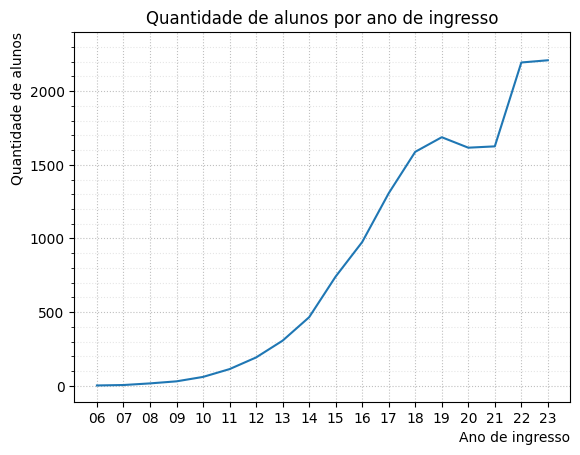

In [102]:
plt.plot(RAs_por_ano.keys(), RAs_por_ano.values())

plt.yticks(np.arange(0, 2500, 200))

plt.yticks(np.arange(0, 2500, 500))
plt.yticks(np.arange(0, 2500, 100), minor=True)

plt.grid(which='minor', alpha=0.2, linestyle="dotted", color='grey')
plt.grid(which='major', alpha=0.5, linestyle="dotted", color='grey')

plt.ylabel("Quantidade de alunos", loc="top")
plt.xlabel("Ano de ingresso", loc="right")

plt.title("Quantidade de alunos por ano de ingresso")

plt.savefig("./imagens/alunos_por_ano.png")

In [68]:
# maiores turmas

maiores_turmas = {a:[] for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" in d[0]: 
            maiores_turmas[q].append(d)
    
    maiores_turmas[q].sort(key=lambda a:a[1], reverse=True)

for i in quads: print("{}".format(i), end=' | ')
print()

print(maiores_turmas)

2022_3 | 2023_1 | 2023_2 | 2023_3 | 
{'2022_3': [('NB1BIN0406-15SA', 134), ('DB1BIN0406-15SA', 129), ('DB2BIN0406-15SA', 111), ('NA2BHQ0003-15SB', 105), ('NC3BIS0003-15SA', 104), ('NA1ESHR004-13SB', 103), ('NA1BCN0402-15SB', 103), ('NBESTO012-17SB', 102), ('NA1BHO0102-15SB', 102), ('NA1BHP0202-15SB', 102), ('NA1ESHC040-21SB', 102), ('NA1ESHP018-14SB', 102), ('NA1BCN0405-15SA', 101), ('DA1BHO0001-19SB', 101), ('NA1BHQ0004-19SB', 100), ('NA1ESHP022-14SB', 99), ('NA1BIN0406-15SA', 98), ('NA1BHO1102-19SB', 98), ('NA1BHO0101-15SB', 98), ('NA3BIS0003-15SA', 98), ('NA1ESHC034-21SB', 98), ('NA2BHO0102-15SB', 98), ('DB1BIS0003-15SA', 98), ('NB1ESTO008-17SA', 97), ('NA2BIN0406-15SB', 97), ('NB1BCM0506-15SB', 97), ('NA1ESHP007-13SB', 97), ('NA1MCTB001-17SA', 97), ('NA1BIQ0602-15SB', 97), ('NA1BIQ0602-15SA', 97), ('NB1BIR0004-15SA', 97), ('DA1ESTO012-17SA', 96), ('NA2BIR0004-15SA', 96), ('DA1BHQ0001-15SB', 96), ('NB1BCM0506-15SA', 96), ('NA1ESHR018-13SB', 96), ('NA1BIR0603-15SB', 95), ('DB1ESTO012

In [69]:
# turmas com mais matrículas

for i in maiores_turmas:
    print(i)
    for j in range(5):
        print("{} : {}".format(maiores_turmas[i][j][0], maiores_turmas[i][j][1]))
    print()

2022_3
NB1BIN0406-15SA : 134
DB1BIN0406-15SA : 129
DB2BIN0406-15SA : 111
NA2BHQ0003-15SB : 105
NC3BIS0003-15SA : 104

2023_1
NB3BCN0402-15SA : 130
NA3BCN0402-15SA : 130
NA1BCN0402-15SA : 129
NA1BIS0003-15SA : 128
NB1BCN0402-15SA : 128

2023_2
NB2BIN0406-15SA : 132
DA1BHQ0002-15SB : 130
DB2BIN0406-15SA : 129
NA1BIN0406-15SA : 128
NB1BCL0306-15SB : 126

2023_3
NA2BCN0405-15SA : 133
NA1BHO0102-15SB : 133
NB1BCN0402-15SA : 132
NB2BCN0405-15SA : 131
DA3BCN0402-15SA : 128



In [70]:
# disciplinas com mais matriculas
# usar as contas do bloco de cima pra facilitar

disc_mais = [("sla", -10) for i in range(5)]
disc_menos = [("sla", 5000000) for i in range(5)]

matriculas_disc = {a:0.0 for a in Disciplinas}

for i in quads:
    for j in maiores_turmas[i]:
        matriculas_disc[discFromTurma(j[0])]+= j[1]

# print(list(matriculas_disc.items()))

for i in list(matriculas_disc.items()):
    for k in range(5):
        if i[1] > disc_mais[k][1]: 
            disc_mais[k] = i
            break
        elif i[1] < disc_menos[k][1]:   
            disc_menos[k] = i
            break

print(disc_mais)
print(disc_menos)

[('BIS0003-15', 6322.0), ('BCN0402-15', 4138.0), ('BCL0306-15', 3879.0), ('BCN0404-15', 3627.0), ('BCM0504-15', 3143.0)]
[('NHZ2069-18', 1.0), ('NHZ2054-18', 1.0), ('MCZB025-13', 2.0), ('NHZ3075-15', 2.0), ('ESZM013-17', 4.0)]


In [71]:
# Mapear quadrimestres quando a interação entre veteranos e
# ingressantes é iniciada e quando ela aumenta

# pra fazer isso, preciso projetar o grafo usando os RAs e comparar o atributo de ano de ingresso dos vertices de cada aresta

ingressantes_diferentes = {k:{i:0.0 for i in anos} for k in quads}  

for k in anos:
    for i in quads:
        for ed in grafos_projetados_RA[i].edges():
            if ano(ed[0]) != ano(ed[1]) and (ano(ed[0]) == k or ano(ed[1]) == k): 
                ingressantes_diferentes[i][k]+= 1
        ingressantes_diferentes[i][k]/= RAs_por_ano[k]

print(ingressantes_diferentes)

{'2022_3': {'06': 10.666666666666666, '07': 39.5, '08': 89.6470588235294, '09': 47.064516129032256, '10': 56.032786885245905, '11': 78.04385964912281, '12': 78.80829015544042, '13': 88.19543973941369, '14': 87.93991416309012, '15': 101.86253369272237, '16': 111.98155737704919, '17': 132.0504973221117, '18': 151.4874055415617, '19': 161.5050385299348, '20': 165.134900990099, '21': 136.26276923076924, '22': 53.38605287146764, '23': 0.0}, '2023_1': {'06': 125.0, '07': 57.666666666666664, '08': 43.35294117647059, '09': 45.483870967741936, '10': 70.93442622950819, '11': 80.64035087719299, '12': 84.44559585492227, '13': 88.39413680781759, '14': 93.87124463519314, '15': 97.81536388140162, '16': 106.17725409836065, '17': 129.01989288446825, '18': 155.52329974811084, '19': 171.14463544754003, '20': 176.20730198019803, '21': 168.0406153846154, '22': 99.48359161349134, '23': 0.0}, '2023_2': {'06': 20.0, '07': 52.0, '08': 40.11764705882353, '09': 34.806451612903224, '10': 46.26229508196721, '11': 

In [73]:
# tabela RAs de anos diferentes
print("    |", end="")

for i in quads:
    print("  {} |".format(i), end="")

print()

for i in qua:
    print(i, end="  | ")
    for j in ingressantes_diferentes[i]:
        print("{:.4f} | ".format(ingressantes_diferentes[i][j]), end="")
    print()

    |  2022_3 |  2023_1 |  2023_2 |  2023_3 |


NameError: name 'qua' is not defined

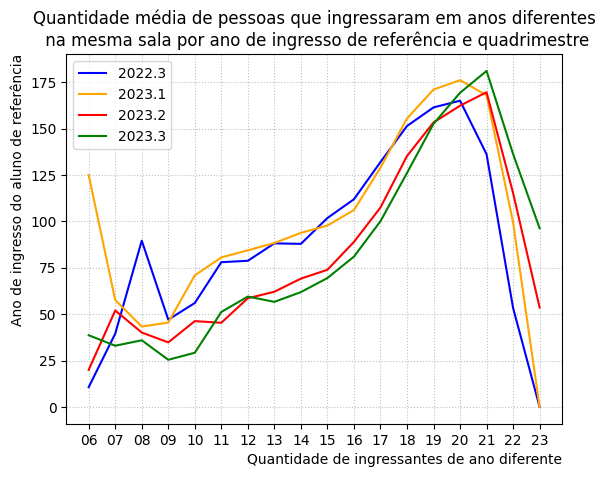

In [74]:
cores = ["blue", "orange", "red", "green"]

for i in range(4):
    plt.plot(ingressantes_diferentes[quads[i]].keys(), ingressantes_diferentes[quads[i]].values(), color=cores[i], label="{}.{}".format(quads[i][0:4], quads[i][5:6]))

plt.title("Quantidade média de pessoas que ingressaram em anos diferentes\n na mesma sala por ano de ingresso de referência e quadrimestre")
plt.grid(True, linestyle='dotted', alpha=0.5, color="grey")
plt.xlabel("Quantidade de ingressantes de ano diferente", loc="right")
plt.ylabel("Ano de ingresso do aluno de referência", loc="top")
plt.legend(loc="upper left")

plt.savefig("./imagens/Anos_diferentes.png")

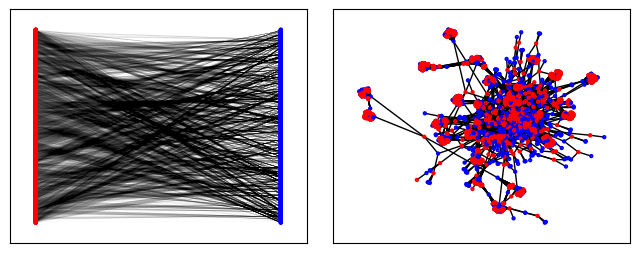

In [75]:
# plotando os grafos dos bixos de 22 de exemplo
fig = plt.figure("a", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax2 = fig.add_subplot(axgrid[3:, 2:])

arestas_bixos_22 = []
bixos_22 = []
turmas_22 = []

for i in grafos_por_quad["2022_3"].edges():
    if "112022" in i[0] or "112022" in i[1]: arestas_bixos_22.append(i)
    if "112022" in i[0]: bixos_22.append(i[0])
    else: turmas_22.append(i[0])

    if "112022" in i[1]: bixos_22.append(i[1])
    else: turmas_22.append(i[1])

te = nx.edge_subgraph(grafos_por_quad["2022_3"], arestas_bixos_22)

color = []

k = nx.get_node_attributes(te, "bipartite")

for i in k:
    if k[i] == 0:
        color.append("#ff0000")
    else: 
        color.append("#0000ff")

args = {
    "G":te, 
    "node_size":5, 
    "node_shape":".", 
    "node_color":color, 
    "with_labels":False, 
    "arrows":False,
    "pos":nx.bipartite_layout(te, bixos_22, align="vertical"),
    "width":0.01, 
    "ax":ax1,
    "linewidths":2
}

args2 = {
    "G":te, 
    "node_size":5, 
    "node_shape":".", 
    "node_color":color, 
    "with_labels":False, 
    "arrows":False,
    #"pos":nx.bipartite_layout(te, bixos_22, align="horizontal", ax=ax1),
    "width":1, 
    "ax":ax2,
    "linewidths":2
}

nx.draw_networkx(**args)
nx.draw_networkx(**args2)
# plt.savefig("test.pdf") # não ta funfando direito

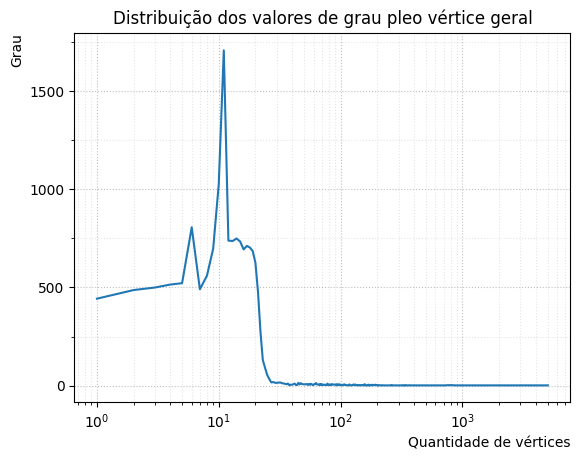

In [103]:
# graficos representando os graus do grafo geral
degree_sequence = sorted((d for n, d in grafo_global.degree()), reverse=True)

plt.xscale("log")

plt.plot(*np.unique(degree_sequence, return_counts=True))
plt.title("Distribuição dos valores de grau pleo vértice geral")
plt.xlabel("Quantidade de vértices", loc="right")
plt.ylabel("Grau", loc="top")

plt.yticks(np.arange(0, 2000, 200))

plt.yticks(np.arange(0, 2000, 500))
plt.yticks(np.arange(0, 2000, 250), minor=True)

plt.grid(which='minor', alpha=0.2, linestyle="dotted", color='grey')
plt.grid(which='major', alpha=0.5, linestyle="dotted", color='grey')

plt.savefig("./imagens/Distribuição_grau.png")

In [77]:
# provavelmente inutil agora
# isso projeta o grafo original com os pesos sendo as turmas compartilhadas pelas pessoas

# g2 = nx.bipartite.weighted_projected_graph(grafo_global, RAs) 

# C = 0

# print(g2)

# for k in list(nx.get_edge_attributes(g2, "weight").values()):
#     print(k)
#     # C+= k

# print(C / len(RAs))

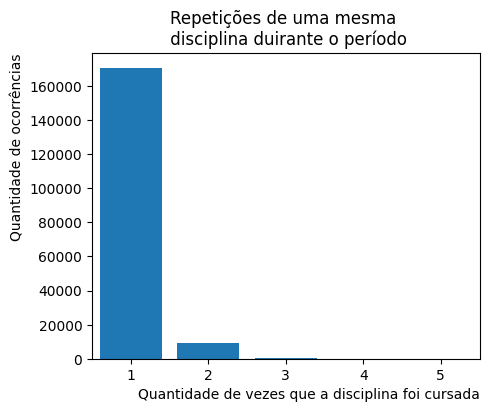

quandidade média de disciplinas cursadas no período? 12.619006736230352
quandtidade média de vezes que uma disciplina é repetida: 1.0586217977129686
(array([1, 2, 3, 4, 5]), array([170677,   9105,    667,     46,      1], dtype=int64))


In [78]:
# conferir a matematica daqi
# possivelmente a quantidade média de disciplinas cursadas por pessoa em

fig = plt.figure("Degree of a random graph", figsize=(5, 5))

axgrid = fig.add_gridspec(5, 5)

ax1 = fig.add_subplot(axgrid[1:, :5])

wei = nx.get_edge_attributes(grafo_global, "weight")

aver = 0

for i in wei:
    aver+= wei[i]

ee = []

for i in wei:
    ee.append(wei[i])

ee.sort()

ax1.bar(*np.unique(ee, return_counts=True))
ax1.set_xlim(0.5, 5.5)
ax1.set_title("Repetições de uma mesma \n disciplina duirante o período")
ax1.set_xlabel("Quantidade de vezes que a disciplina foi cursada", loc="right")
ax1.set_ylabel("Quantidade de ocorrências", loc="top")

plt.show()

print("quandidade média de disciplinas cursadas no período? {}".format(aver / len(RAs)))
print("quandtidade média de vezes que uma disciplina é repetida: {}".format(aver / 180496))

print(np.unique(ee, return_counts=True))
fig.savefig("./imagens/Repetições.png")

In [79]:
# tamanho médio de turmas

tamanho_medio = {a:0.0 for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" in d[0]: tamanho_medio[q]+= d[1]
    
    tamanho_medio[q]/= len(turmas_por_quad[q])

print(tamanho_medio)


{'2022_3': 44.148878923766816, '2023_1': 45.700819672131146, '2023_2': 42.66382978723404, '2023_3': 48.077709611451944}


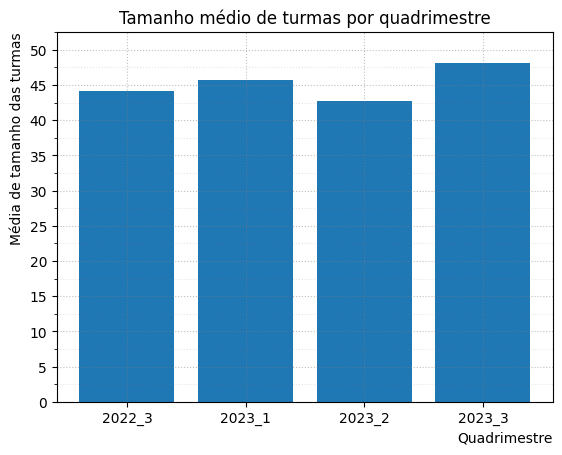

In [80]:
plt.bar(tamanho_medio.keys(), tamanho_medio.values())

plt.yticks(np.arange(0, 55, 5))

plt.yticks(np.arange(0, 55, 5))
plt.yticks(np.arange(0, 55, 2.5), minor=True)

plt.grid(which='minor', alpha=0.2, linestyle="dotted", color='grey')
plt.grid(which='major', alpha=0.5, linestyle="dotted", color='grey')

plt.ylabel("Média de tamanho das turmas", loc="top")
plt.xlabel("Quadrimestre", loc="right")

plt.title("Tamanho médio de turmas por quadrimestre")
plt.savefig("./imagens/Tamanho_medio.png")


In [81]:
# **grafico**
# quantidade média de matrículas por quadrimestre e por ano de ingresso

matriculas_medias = {a:0.0 for a in quads}
matriculas_medias_ano = {a:{b:0.0 for b in anos} for a in quads}

for q in quads:
    aux = nx.degree(grafos_por_quad[q])
    for d in aux:
        if "-" not in d[0] and len(d[0]) > 7: 
            matriculas_medias[q]+= d[1]
            matriculas_medias_ano[q][str(ano(d[0]))]+= d[1]
    
    matriculas_medias[q]/= len(RAs_por_quad[q])
    for a in anos:
        matriculas_medias_ano[q][a]/= RAs_por_ano[a]


print(matriculas_medias)
print(matriculas_medias_ano)

{'2022_3': 4.058537389727101, '2023_1': 3.82112567463377, '2023_2': 3.9912420382165603, '2023_3': 3.8731466227347613}
{'2022_3': {'06': 0.3333333333333333, '07': 1.1666666666666667, '08': 2.1176470588235294, '09': 1.2903225806451613, '10': 1.4426229508196722, '11': 1.9473684210526316, '12': 1.7357512953367875, '13': 1.990228013029316, '14': 2.092274678111588, '15': 2.3827493261455523, '16': 2.7325819672131146, '17': 3.2731446059678655, '18': 3.865869017632242, '19': 4.004742145820984, '20': 3.832920792079208, '21': 3.945846153846154, '22': 5.78714676390155, '23': 0.0}, '2023_1': {'06': 3.3333333333333335, '07': 1.8333333333333333, '08': 1.1176470588235294, '09': 1.3225806451612903, '10': 1.6721311475409837, '11': 1.8421052631578947, '12': 1.7564766839378239, '13': 1.9022801302931596, '14': 2.087982832618026, '15': 2.1778975741239894, '16': 2.4149590163934427, '17': 2.929609793420046, '18': 3.7191435768261965, '19': 3.965026674570243, '20': 3.827970297029703, '21': 4.08, '22': 4.1485870

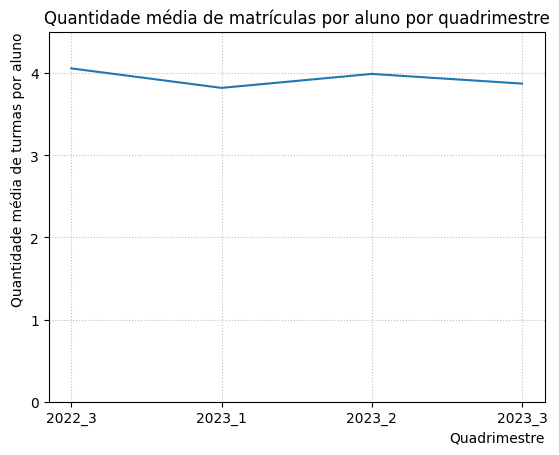

In [82]:
plt.plot(matriculas_medias.keys(), matriculas_medias.values())
plt.ylim(0, 4.5)

plt.yticks(np.arange(0, 5, 1))

plt.yticks(np.arange(0, 5, 1))

plt.grid(which='major', alpha=0.5, linestyle="dotted", color='grey')

plt.ylabel("Quantidade média de turmas por aluno", loc="top")
plt.xlabel("Quadrimestre", loc="right")

plt.title("Quantidade média de matrículas por aluno por quadrimestre")
plt.savefig("./imagens/Matriculas_por_quad.png")

Text(0.5, 0.98, 'Categorical Plotting')

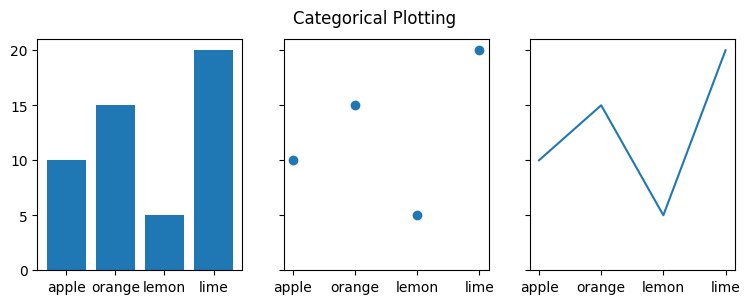

In [83]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [84]:
# tabela de quantidade media de matriculas
print("        |", end="")

for i in anos:
    print("  {} |".format(i), end="")

print()

for i in matriculas_medias_ano:
    print(i, end="  | ")
    for j in matriculas_medias_ano[i]:
        print("{:.1f} | ".format(matriculas_medias_ano[i][j]), end="")
    print()

        |  06 |  07 |  08 |  09 |  10 |  11 |  12 |  13 |  14 |  15 |  16 |  17 |  18 |  19 |  20 |  21 |  22 |  23 |
2022_3  | 0.3 | 1.2 | 2.1 | 1.3 | 1.4 | 1.9 | 1.7 | 2.0 | 2.1 | 2.4 | 2.7 | 3.3 | 3.9 | 4.0 | 3.8 | 3.9 | 5.8 | 0.0 | 
2023_1  | 3.3 | 1.8 | 1.1 | 1.3 | 1.7 | 1.8 | 1.8 | 1.9 | 2.1 | 2.2 | 2.4 | 2.9 | 3.7 | 4.0 | 3.8 | 4.1 | 4.1 | 0.0 | 
2023_2  | 0.7 | 1.5 | 1.1 | 0.9 | 1.0 | 1.2 | 1.3 | 1.4 | 1.5 | 1.6 | 2.0 | 2.4 | 3.2 | 3.6 | 3.6 | 3.6 | 3.3 | 5.4 | 
2023_3  | 0.7 | 1.2 | 0.9 | 0.8 | 0.8 | 1.2 | 1.3 | 1.2 | 1.3 | 1.5 | 1.8 | 2.2 | 3.0 | 3.5 | 3.6 | 3.8 | 3.4 | 4.3 | 


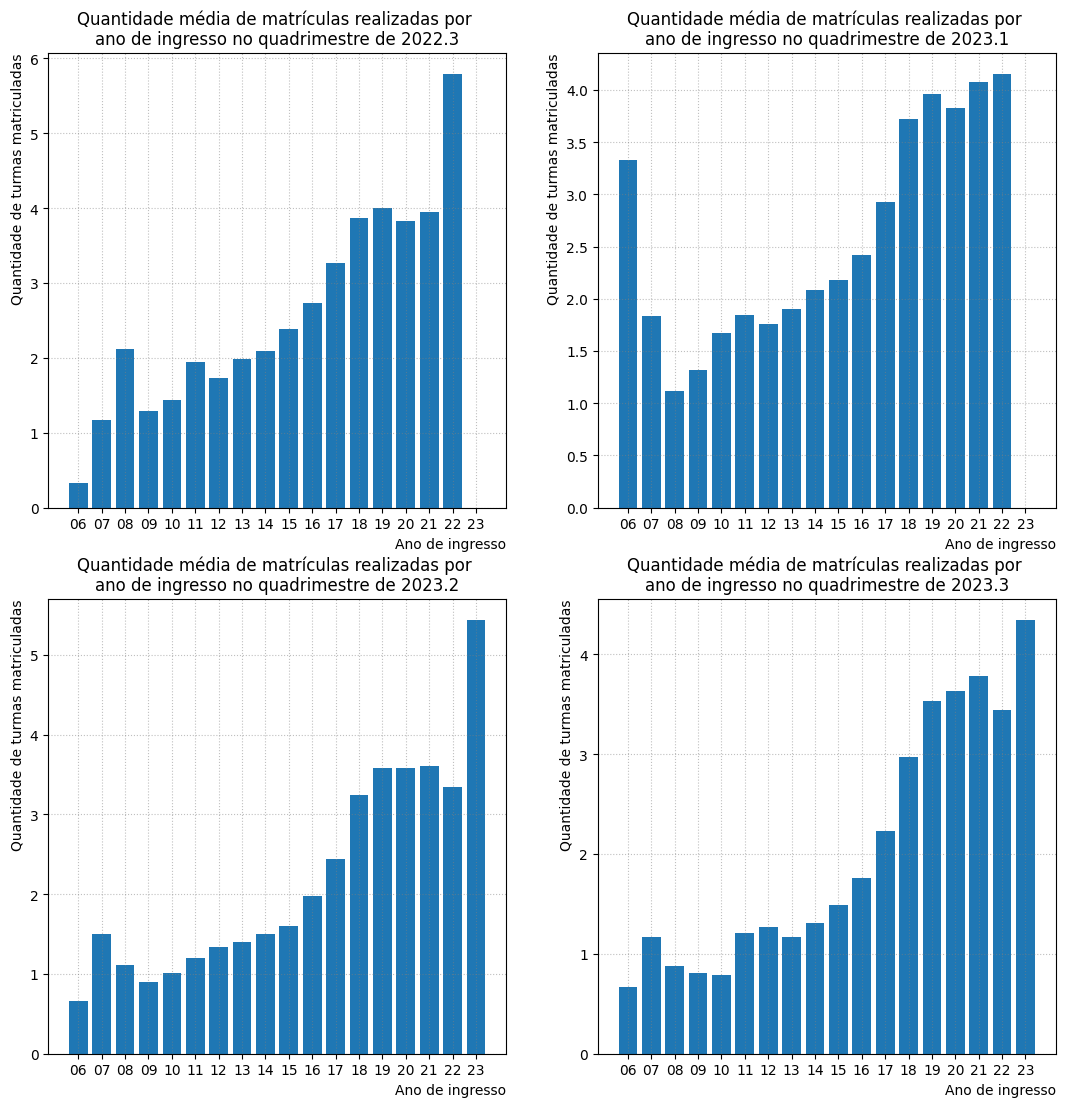

In [85]:
# plotando a quantidade média de matrículas

m = [0, 6, 7, 13]

fig = plt.figure(figsize=(m[3], m[3]))

axgrid = fig.add_gridspec(m[3], m[3])

ax = []


limits = [((m[0], m[1]), (m[0], m[1])), ((m[0], m[1]), (m[2], m[3])), ((m[2], m[3]), (m[0], m[1])), ((m[2], m[3]), (m[2], m[3]))]

cores = ["blue", "yellow", "red", "green"]

for i in limits:
    ax.append(fig.add_subplot(axgrid[i[0][0]:i[0][1], i[1][0]:i[1][1]]))

for i in range(4):
    ax[i].bar(matriculas_medias_ano[quads[i]].keys(), matriculas_medias_ano[quads[i]].values())
    ax[i].set_title("Quantidade média de matrículas realizadas por \nano de ingresso no quadrimestre de {}.{}".format(quads[i][0:4], quads[i][5:6]))
    ax[i].grid(True, linestyle='dotted', alpha=0.5, color="grey")
    ax[i].set_xlabel("Ano de ingresso", loc="right")
    ax[i].set_ylabel("Quantidade de turmas matriculadas", loc="top")

plt.savefig("./imagens/Graficos_matriculas_medias_ano_barras.png")

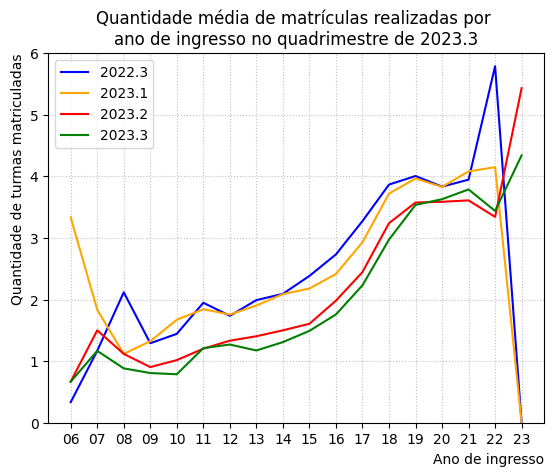

In [86]:
# plotando a quantidade média de matrículas

m = [0, 6, 7, 13]

limits = [((m[0], m[1]), (m[0], m[1])), ((m[0], m[1]), (m[2], m[3])), ((m[2], m[3]), (m[0], m[1])), ((m[2], m[3]), (m[2], m[3]))]

cores = ["blue", "orange", "red", "green"]


for i in range(4):
    plt.plot(matriculas_medias_ano[quads[i]].keys(), matriculas_medias_ano[quads[i]].values(), color=cores[i], label="{}.{}".format(quads[i][0:4], quads[i][5:6]))

plt.title("Quantidade média de matrículas realizadas por \nano de ingresso no quadrimestre de {}.{}".format(quads[i][0:4], quads[i][5:6]))
plt.grid(True, linestyle='dotted', alpha=0.5, color="grey")
plt.xlabel("Ano de ingresso", loc="right")
plt.ylabel("Quantidade de turmas matriculadas", loc="top")
plt.legend(loc="upper left")
plt.ylim(0, 6)

plt.savefig("./imagens/Graficos_matriculas_medias_ano_linhas.png")

In [87]:
print(nx.degree_histogram(grafo_global))
print(nx.density(grafo_global))

[0, 443, 487, 500, 515, 522, 807, 491, 560, 698, 1027, 1709, 739, 737, 750, 734, 694, 712, 704, 686, 626, 477, 275, 130, 90, 54, 33, 16, 18, 14, 14, 15, 16, 12, 11, 9, 7, 10, 1, 5, 4, 7, 10, 3, 3, 14, 6, 12, 9, 7, 6, 7, 6, 8, 4, 7, 4, 9, 7, 2, 4, 8, 7, 13, 6, 5, 4, 7, 3, 8, 2, 6, 4, 3, 5, 4, 2, 4, 10, 3, 3, 6, 3, 3, 7, 4, 6, 5, 5, 5, 6, 4, 1, 7, 2, 4, 6, 3, 6, 4, 4, 4, 1, 3, 3, 5, 2, 4, 6, 4, 3, 3, 3, 1, 0, 1, 1, 3, 6, 4, 2, 1, 1, 2, 1, 2, 2, 0, 6, 0, 2, 4, 2, 5, 2, 2, 2, 1, 3, 3, 1, 0, 0, 1, 3, 2, 0, 1, 0, 3, 0, 2, 3, 0, 1, 4, 3, 1, 7, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 5, 4, 1, 1, 2, 1, 1, 2, 0, 4, 2, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 4, 3, 0, 3, 4, 0, 3, 0, 2, 3, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

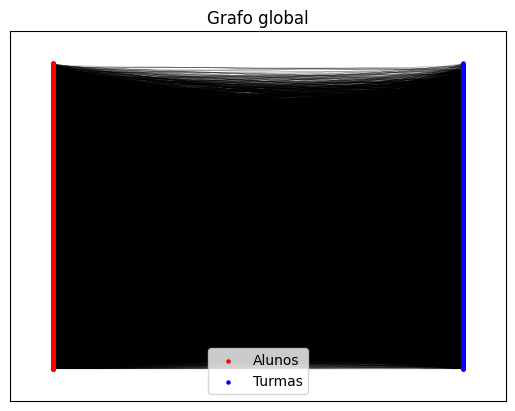

In [98]:
# G = ig.Graph.from_networkx(grafo_global)
# color = []

# k = nx.get_node_attributes(grafo_global, "bipartite")

# for i in k:
#     if k[i] == 0:
#         color.append("#ff0000")
#     else: 
#         color.append("#0000ff")

layout = nx.bipartite_layout(grafos_por_quad["2023_1"], RAs_por_quad["2023_1"], align="vertical") # funciona ja

plt.title("Grafo global")

nx.draw_networkx_nodes(grafos_por_quad["2023_1"], nodelist=RAs_por_quad["2023_1"], node_color="#ff0000", label="Alunos", node_size=20, node_shape='.', pos=layout)
nx.draw_networkx_nodes(grafos_por_quad["2023_1"], nodelist=turmas_por_quad["2023_1"], node_color="#0000ff", label="Turmas", node_size=20, node_shape='.', pos=layout)
nx.draw_networkx_edges(grafos_por_quad["2023_1"], width=0.1, pos=layout)

plt.legend(loc="lower center")
# plt.savefig("grafo1.png")